## Calculating Means and Medians

I recorded the units of alcohol I drank for the last two weeks. Grab a calculator and work out the mean and median amount. What do these tell you about my drinking habits?

In [1]:
%load_ext lab_black

In [2]:
consumption_per_day = [1, 0, 0, 3, 0, 9, 11, 0, 0, 2, 2, 0, 8, 6]

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(consumption_per_day, columns=["consumption"])

Sum of all the values

In [5]:
df.sum()

consumption    42
dtype: int64

Number of cases

In [6]:
df.count()

consumption    14
dtype: int64

The mean

In [7]:
df.mean()

consumption    3.0
dtype: float64

Order of values from lowest to highest

In [8]:
df.sort_values(by="consumption")

,consumption
1,0
2,0
4,0
7,0
8,0
11,0
0,1
9,2
10,2
3,3


Rank of values from lowest to highest

In [9]:
df.sort_values(by="consumption").reset_index()

,index,consumption
0,1,0
1,2,0
2,4,0
3,7,0
4,8,0
5,11,0
6,0,1
7,9,2
8,10,2
9,3,3


The median

In [10]:
df.sort_values(by="consumption").reset_index().median()

index          6.5
consumption    1.5
dtype: float64

So what can you say about my drinking habits?

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
xs, ys = zip(*[(index + 1, row["consumption"]) for index, row in df.iterrows()])

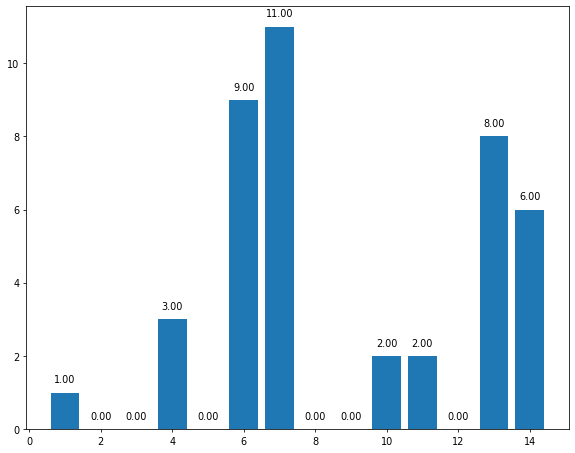

<Figure size 2880x2880 with 0 Axes>

In [13]:
width_in_inches = 10
height_in_inches = 8
dots_per_inch = 70

plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)

plt.bar(xs, ys)

# zip joins x and y coordinates in pairs
for x, y in zip(xs, ys):

    label = "{:.2f}".format(y)

    plt.annotate(
        label,  # this is the text
        (x, y),  # this is the point to label
        textcoords="offset points",  # how to position the text
        xytext=(0, 10),  # distance from text to points (x,y)
        ha="center",
    )  # horizontal alignment can be left, right or center
plt.figure(figsize=(40, 40))
plt.show()

Applying mean and median for the whole set is quite bad. On average, you drink around 3 per day. But, that is skewed by your weekend consumption which is around 6-11 per day. Median doesn't make sense as you're not comparing how good a certain day is versus the rest. Mode might make sense as you'd like to know how many usually you take.

Here's the mode

In [14]:
df.mode()

,consumption
0,0


yup, usually you don't drink, but when you do:

In [15]:
weekday_consumption_df = df.drop([5, 6, 12, 13])[df["consumption"] != 0]
weekend_consumption_df = df.iloc[[5, 6, 12, 13], :]

D:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [16]:
print(
    f"During weekdays, you take around {weekday_consumption_df['consumption'].mean()} on average."
)
print(
    f"During weekends, you take around {weekend_consumption_df['consumption'].mean()} on average."
)

During weekdays, you take around 2.0 on average.
During weekends, you take around 8.5 on average.


## What is the spread or dispersion of data?

### How to calculate the interquartile range?

In [17]:
country_religion_value = pd.read_csv("country_religion_value.csv")

In [18]:
country_religion_value.describe()

,percent
count,21.000000
mean,41.619048
std,31.958530
min,3.000000
25%,14.000000
50%,26.000000
75%,67.000000
max,94.000000


In [19]:
country_religion_value.quantile([0, 0.25, 0.5, 0.75, 1])

,percent
0.00,3.0
0.25,14.0
0.50,26.0
0.75,67.0
1.00,94.0


In [20]:
cr_quantile = country_religion_value.quantile([0, 0.25, 0.5, 0.75, 1])["percent"]

In [21]:
print(f"Minimum: {cr_quantile[0]}")
print(f"Lower Quartile: {cr_quantile[0.25]}")
print(f"Median: {cr_quantile[0.5]}")
print(f"Upper Quartile: {cr_quantile[0.75]}")
print(f"Maximum: {cr_quantile[1]}")


print(f"Interquarile Range: {cr_quantile[0.75] - cr_quantile[0.25]}")

Minimum: 3.0
Lower Quartile: 14.0
Median: 26.0
Upper Quartile: 67.0
Maximum: 94.0
Interquarile Range: 53.0


In [22]:
country_religion_value.sort_values(by="percent", ascending=False).style.apply(
    lambda x: [
        "background: lightgreen" if x["percent"] in cr_quantile.to_list() else ""
        for i in x
    ],
    axis=1,
)

,country,percent
5,Egypt,94
12,Pakistan,90
11,Nigeria,90
13,Philippines,86
9,Iraq,85
8,India,67
16,South Africa,56
2,Brazil,52
15,Singapore,43
20,USA,40


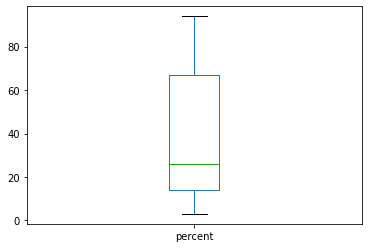

In [23]:
country_religion_value.plot.box()